In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 120, 5)
        self.fc1 = nn.Linear(120 * 1 * 1, 84)
        self.fc2 = nn.Linear(84, 10)
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3 (x))
        x = self.pool(x)
        x = x.view(-1, 120 * 1 * 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9,0.99), eps=1e-08, weight_decay=0.001) 

In [5]:
num_epochs = 20
total_step = len(trainloader)
Loss = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 1.5432
----------------------------------------------------
Epoch 2  | Loss : 1.2461
----------------------------------------------------
Epoch 3  | Loss : 1.1387
----------------------------------------------------
Epoch 4  | Loss : 1.0729
----------------------------------------------------
Epoch 5  | Loss : 1.0278
----------------------------------------------------
Epoch 6  | Loss : 0.9933
----------------------------------------------------
Epoch 7  | Loss : 0.9726
----------------------------------------------------
Epoch 8  | Loss : 0.9526
----------------------------------------------------
Epoch 9  | Loss : 0.9315
----------------------------------------------------
Epoch 10  | Loss : 0.9236
----------------------------------------------------
Epoch 11  | Loss : 0.9142
----------------------------------------------------
Epoch 12  | Loss : 0.9104
----------------------------------------------------
Epoch 13

In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


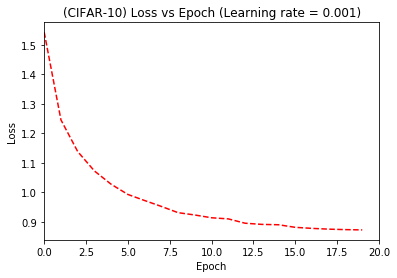

In [7]:
plt.plot(Loss, 'r--')
plt.title("(CIFAR-10) Loss vs Epoch (Learning rate = 0.001)")
plt.xlim([0, num_epochs])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()